## # Reliability of Keyness measures

Source of data: https://osf.io/r9atd

In [82]:
pip install pygal  #Installing pygal

To display the chart within the Jupyter Notebook:

In [83]:
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

# Reliability of Keyness measures
We import `pandas` and `pygal` and read in the csv-File. Printing out the table to check if it is ok:

In [30]:
import pandas as pd

# Pfad zu deiner Datei anpassen
file_path = "reliability.txt"

# Korrekte Trennzeichen angeben (Tabulator)
df = pd.read_csv(file_path, sep='\t')

# DataFrame anzeigen
df

,metric,type_short,type,desc_inf,cor_ranks
1,Likelihood ratio test (B),3f_d,Frequency difference,2,0.813932
2,Chi-squared test (B),3f_d,Frequency difference,2,0.815383
3,BIC (B),3f_d,Frequency difference,2,0.813932
4,Signed DKL (B),3f_d,Frequency difference,1,0.723501
5,TD-based LR test (T),4d_d,Dispersion difference,2,0.808353
6,Rate ACAD (B),1f,Frequency,1,0.882807
7,Rate difference (B),3f_d,Frequency difference,1,0.903800
8,Rate ratio (B),3f_d,Frequency difference,1,0.895928
9,TD ratio (T),4d_d,Dispersion difference,1,0.902728
10,"Wilcoxon rank sum test, PS (T)",3f_d,Frequency difference,2,0.926907


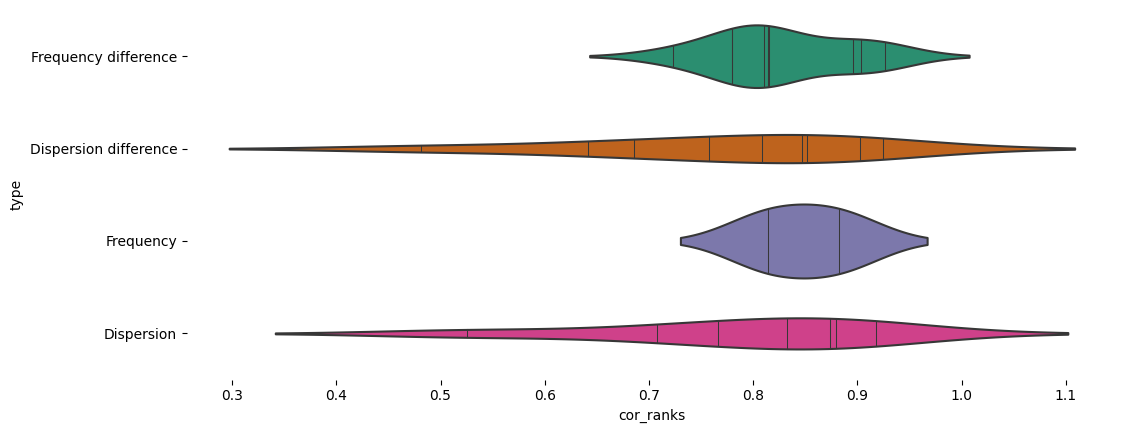

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='cor_ranks', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

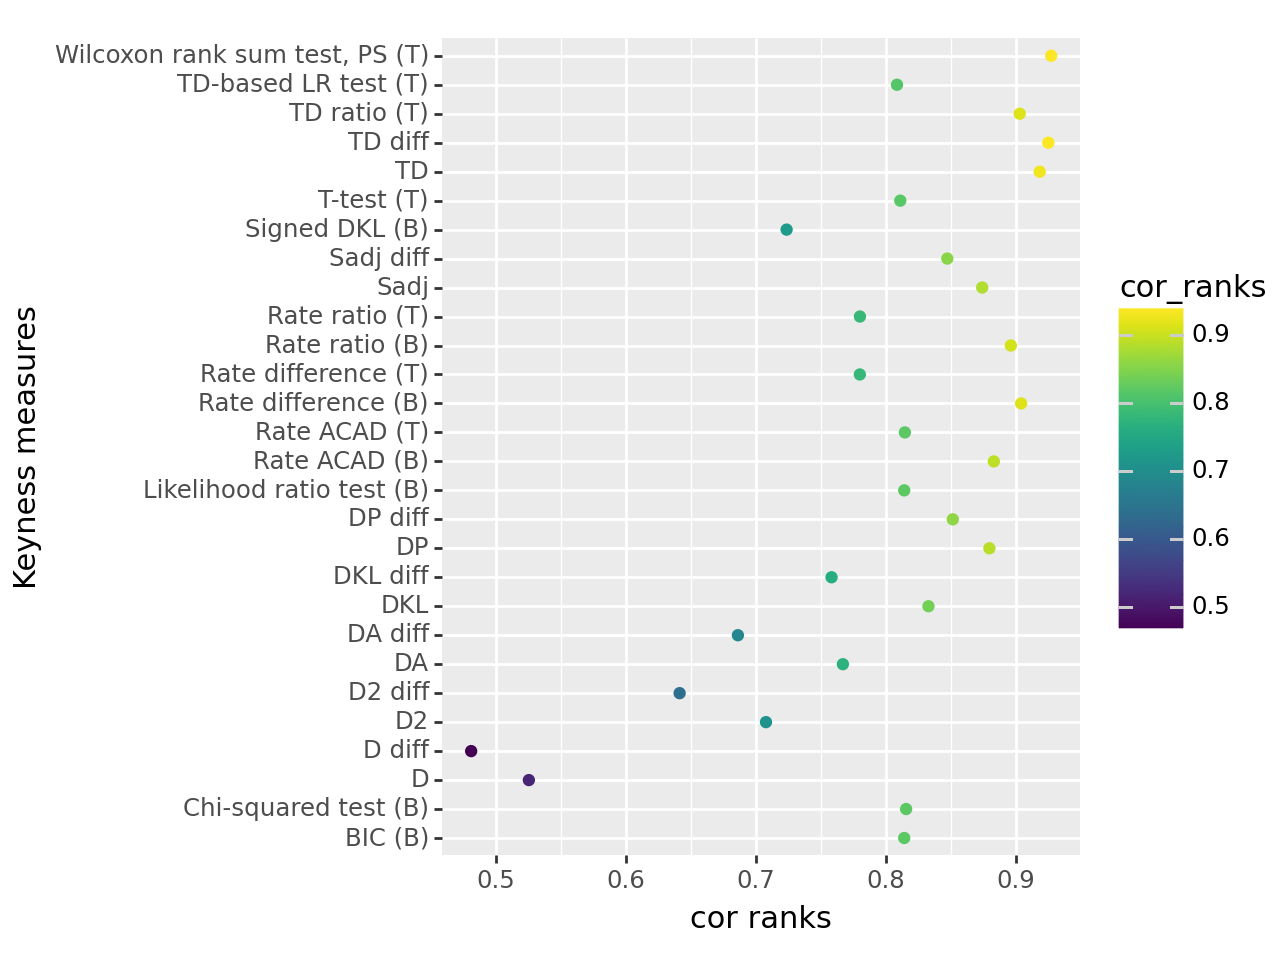

In [27]:
from plotnine import ggplot, aes, geom_point, theme, labs

# Create the scatterplot
scatter_plot = (ggplot(df, aes(x='cor_ranks', y='metric', color ='cor_ranks'))
                + geom_point()
              #  + theme(legend_position='right')
                + labs(x='cor ranks', y='Keyness measures'))

# Display the plot
print(scatter_plot)

In [28]:
import plotly.express as px

fig = px.scatter(df, x='cor_ranks', y='metric', color='cor_ranks',  text ='metric')
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))
fig.update_layout(title='Keyness measures - an overview ',
                  xaxis_title='Reliability (cf. Sönning 2022)',
                  yaxis_title='Keyness Measures'
                  )

fig.show()
fig.write_html("scatterplot_plotly.html")

In [39]:
pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 4.3 MB/s eta 0:00:00


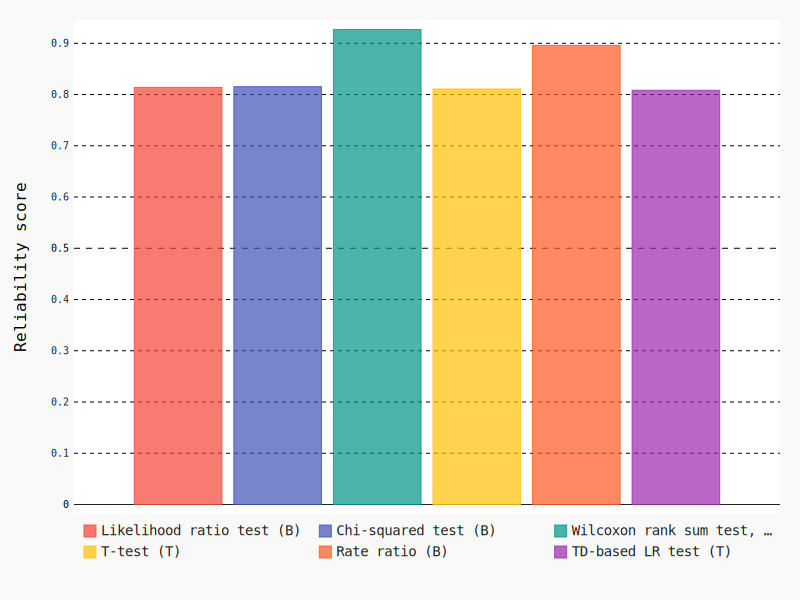

In [80]:
import pygal
from IPython.display import SVG, display, HTML

# Create a bar chart
bar_chart = pygal.Bar()
bar_chart.legend_at_bottom = True

bar_chart.y_title = 'Reliability score'


# Loop through each metric and add bars to the chart
for metric in ['Likelihood ratio test (B)', 'Chi-squared test (B)', 'Wilcoxon rank sum test, PS (T)', 'T-test (T)', 'Rate ratio (B)', 'TD-based LR test (T)']:
    # Filter the dataframe for the current metric
    df_filtered = df[df['metric'] == metric]

    # Create a list of tuples with x (desc_inf) and y (cor_ranks) values for the current metric
    data = [(row['desc_inf'], row['cor_ranks']) for _, row in df_filtered.iterrows()]

    # Sort the data by 'desc_inf' for better presentation
    data.sort(key=lambda x: x[0])

    # Unzip the data to separate 'desc_inf' and 'cor_ranks'
    desc_inf, cor_ranks = zip(*data)

    # Add the bars to the bar chart with a label for the series
    bar_chart.add(metric, cor_ranks)

# Render the bar chart to an SVG file
chart_filename = 'bar_chart.svg'
bar_chart.render_to_file(chart_filename)

# Display the chart in the notebook
display(SVG(filename=chart_filename))


In [81]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import HTML

# Check if 'cor_ranks' column contains numeric data
if not pd.api.types.is_numeric_dtype(df['cor_ranks']):
    raise ValueError("Column 'cor_ranks' must contain numeric data for a gauge chart.")

# List of specified metrics
selected_metrics = ['Likelihood ratio test (B)', 'Chi-squared test (B)', 'Wilcoxon rank sum test, PS (T)', 'T-test (T)', 'Rate ratio (B)', 'TD-based LR test (T)']

# Create a gauge chart
gauge_chart = pygal.Gauge(human_readable=True)

# Loop through each specified metric and add data points to the gauge chart
for metric in selected_metrics:
    # Filter the dataframe for the current metric
    filtered_data = df[df['metric'] == metric]

    # Calculate the average 'cor_ranks' value for the current metric
    avg_cor_ranks = filtered_data['cor_ranks'].mean()

    # Add the data point to the gauge chart with the metric as the label
    gauge_chart.add(metric, [{"value": avg_cor_ranks * 100}])

# Display the gauge chart in the notebook
display(HTML(base_html.format(rendered_chart=gauge_chart.render(is_unicode=True))))


In [77]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import HTML


# Check if 'cor_ranks' column contains numeric data
if not pd.api.types.is_numeric_dtype(df['cor_ranks']):
    raise ValueError("Column 'cor_ranks' must contain numeric data for a gauge chart.")

# List of specific metrics
selected_metrics = ['Likelihood ratio test (B)', 'Chi-squared test (B)', 'Wilcoxon rank sum test, PS (T)', 'T-test (T)']

# Filter the DataFrame for the selected metrics
df_selected_metrics = df[df['metric'].isin(selected_metrics)]

# Calculate mean cor_ranks per type for the selected metrics
mean_by_type_selected_metrics = df_selected_metrics.groupby('metric')['cor_ranks'].mean()

# Create a SolidGauge chart
gauge = pygal.SolidGauge(inner_radius=0.70)
[gauge.add(type_, [{"value": mean * 100}]) for type_, mean in mean_by_type_selected_metrics.iteritems()]

# Display the SolidGauge chart in the notebook
display(HTML(gauge.render(is_unicode=True)))


<ipython-input-77-e045b8979cd8>:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


In [85]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import HTML

# Assuming df is the DataFrame with the required columns

# Check if 'cor_ranks' column contains numeric data
if not pd.api.types.is_numeric_dtype(df['cor_ranks']):
    raise ValueError("Column 'cor_ranks' must contain numeric data for a gauge chart.")

# Filter the DataFrame for 'type' values 'Dispersion' or 'Frequency'
df_filtered_types = df[df['type'].isin(['Dispersion', 'Frequency'])]

# Calculate mean cor_ranks per type for the selected types
mean_by_type_filtered = df_filtered_types.groupby('type')['cor_ranks'].mean()

# Create a SolidGauge chart
gauge = pygal.SolidGauge(inner_radius=0.70)
[gauge.add(type_, [{"value": mean * 100}]) for type_, mean in mean_by_type_filtered.iteritems()]

# Display the SolidGauge chart in the notebook
display(HTML(gauge.render(is_unicode=True)))


<ipython-input-85-9193f0dc6cd1>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


References

* https://feststelltaste.github.io/software-analytics/notebooks/vis/experimental/pandas-pygal/effective_charting.html
* http://www.pygal.org/en/stable/documentation/first_steps.html
* https://programmer.ink/think/python-data-visualization-pygal-svg-csv-bar-line.html
* https://opensource.com/article/20/6/pygal-python